# Opportunity Diagnostics

Characterize the development potential and socioeconomic profile within 1–2 miles of Diridon Station to support transit-oriented development planning and opportunity analysis.

In [38]:
# -----------------------------------------------------
# Step 1: Load Data
# -----------------------------------------------------
from diridon_utils import *

parcels, tracts = load_data()

In [19]:
# ---------------------------------------------
# Step 2: Reproject
# ---------------------------------------------
parcels_m, tracts_m = reproject_for_buffering(parcels, tracts)


In [20]:
# ---------------------------------------------
# Step 3: Build Diridon Buffers
# ---------------------------------------------
diridon_m, buffer_1m, buffer_2m = build_diridon_buffers()

In [ ]:
# ---------------------------------------------
# Step 4: Parcel Summary
# ---------------------------------------------

within_1m, uv, parcel_summary = summarize_parcels(parcels, buffer_1m)

In [28]:
# ---------------------------------------------
# Step 5: ACS Summary
# ---------------------------------------------
acs_cols = {
    "pct_poverty": "pct_poverty",
    "median_income": "median_income",
    "pct_renters": "pct_renters"
}
tracts_sel, acs_summary = summarize_acs(tracts_m, buffer_2m, acs_cols)


Map saved to: ../output/maps/diridon_buffer_map.png


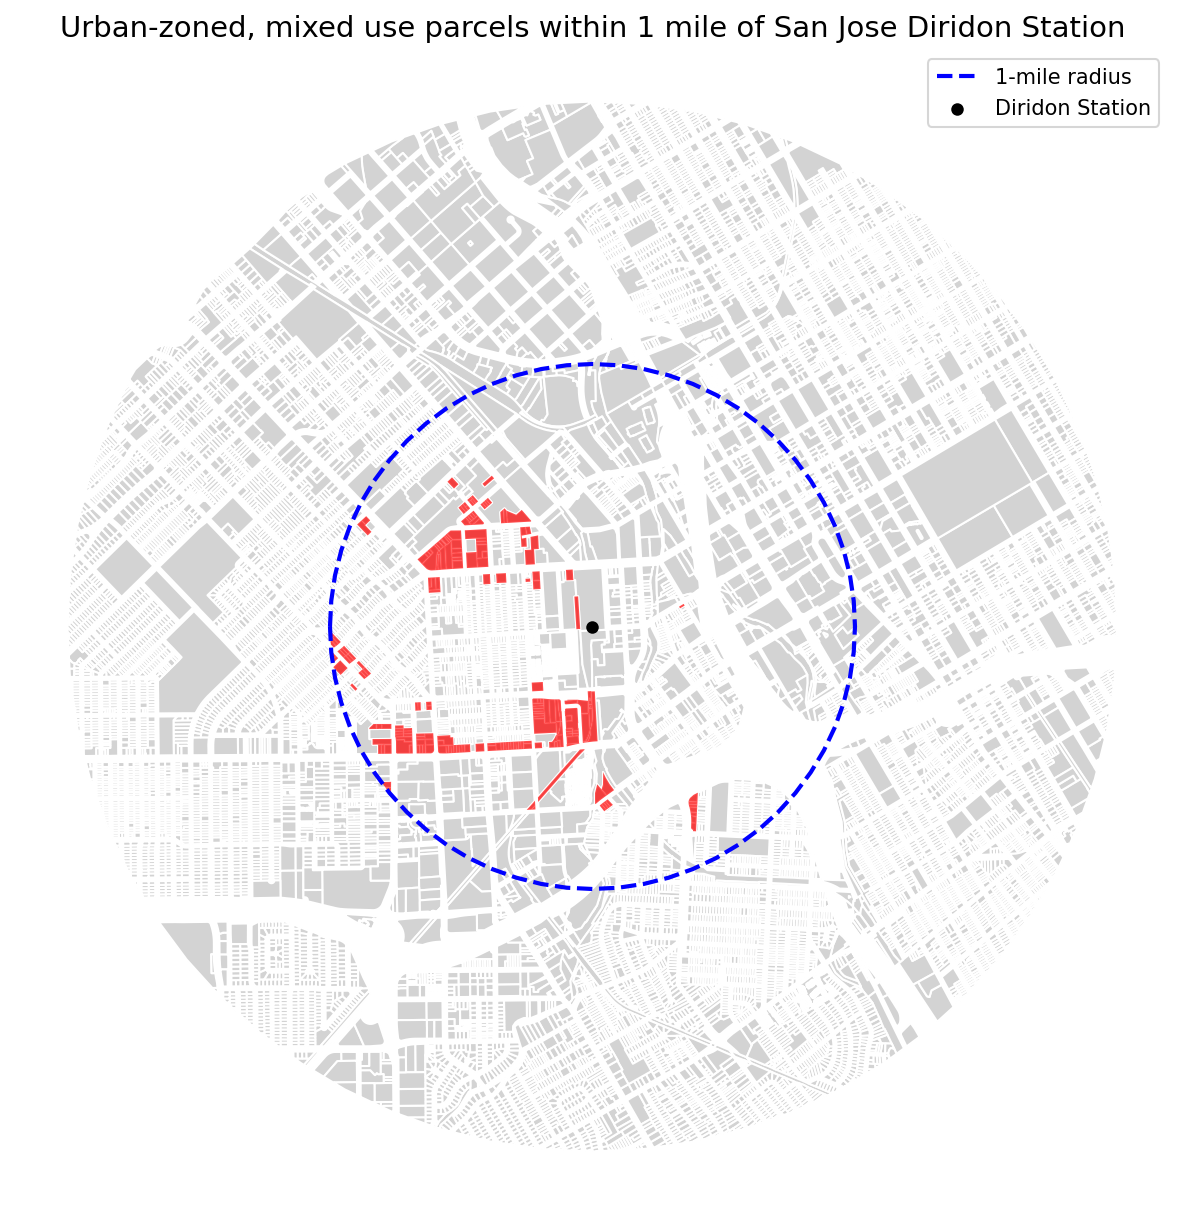

In [41]:
# ---------------------------------------------
# Step 6: Maps
# ---------------------------------------------

map_path = create_maps(parcels, tracts, "../output/maps")
print(f"Map saved to: {map_path}")

from IPython.display import Image
Image(filename=map_path)

In [ ]:
# ---------------------------------------------
# Step 7: Export Outputs
# ---------------------------------------------
export_outputs(...)